# Properties of Gravitational Solitons by Boyd, Centrella & Klasky
##  Geoff Cope
##  Univeristy of Utah
##  December 26, 2021

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.43.379

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,x,y,z,dt,dx,dy,dz = symbols( 't x y z dt dx dy dz' ) 

In [4]:
gamma = Function('gamma')(z,t)
gamma

In [5]:
psi = Function('psi')(z,t)
psi

In [8]:
variables = Matrix( [t,x,y,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix( [dt,dx,dy,dz] )
differentials

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [6]:
lineElement = expand(exp(gamma-psi) * (dz**2 - dt**2) + exp(psi) * dx**2 + t**2 * exp(-psi) * dy**2)
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  γ(z, t)  -ψ(z, t)                                            ⎤
⎢-ℯ       ⋅ℯ             0           0                0         ⎥
⎢                                                               ⎥
⎢                      ψ(z, t)                                  ⎥
⎢         0           ℯ              0                0         ⎥
⎢                                                               ⎥
⎢                                2  -ψ(z, t)                    ⎥
⎢         0              0      t ⋅ℯ                  0         ⎥
⎢                                                               ⎥
⎢                                              γ(z, t)  -ψ(z, t)⎥
⎣         0              0           0        ℯ       ⋅ℯ        ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  γ(z, t)  -ψ(z, t)                                            ⎤
⎢-ℯ       ⋅ℯ             0           0                0         ⎥
⎢                                                               ⎥
⎢                      ψ(z, t)                                  ⎥
⎢         0           ℯ              0                0         ⎥
⎢                                                               ⎥
⎢                                2  -ψ(z, t)                    ⎥
⎢         0              0      t ⋅ℯ                  0         ⎥
⎢                                                               ⎥
⎢                                              γ(z, t)  -ψ(z, t)⎥
⎣         0              0           0        ℯ       ⋅ℯ        ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂                                                                           
⎢⎢──(γ(z, t))   ──(ψ(z, t))                                                                 
⎢⎢∂t            ∂t                                                                          
⎢⎢─────────── - ───────────                  0                                  0           
⎢⎢     2             2                                                                      
⎢⎢                                                                                          
⎢⎢                            -γ(z, t) + 2⋅ψ(z, t) ∂                                        
⎢⎢                           ℯ                    ⋅──(ψ(z, t))                              
⎢⎢                                                 ∂t                                       
⎢⎢            0              ─────────────────────────────────                  0           
⎢⎢                                           2                        

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2              2                         2     2              2         ⎞           
⎢  ⎜   ∂              ∂             ⎛∂          ⎞     ∂              ∂          ⎟   ∂       
⎢t⋅⎜- ───(γ(z, t)) + ───(γ(z, t)) - ⎜──(ψ(z, t))⎟  + ───(ψ(z, t)) - ───(ψ(z, t))⎟ + ──(γ(z, 
⎢  ⎜    2              2            ⎝∂t         ⎠      2              2         ⎟   ∂t      
⎢  ⎝  ∂t             ∂z                              ∂t             ∂z          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                    2⋅t                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

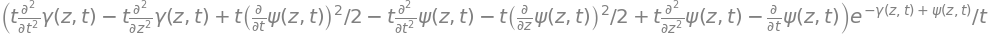

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢  ⎛    2              2                         2     2              2         ⎞           
⎢  ⎜   ∂              ∂             ⎛∂          ⎞     ∂              ∂          ⎟   ∂       
⎢t⋅⎜- ───(γ(z, t)) + ───(γ(z, t)) - ⎜──(ψ(z, t))⎟  + ───(ψ(z, t)) - ───(ψ(z, t))⎟ + ──(γ(z, 
⎢  ⎜    2              2            ⎝∂t         ⎠      2              2         ⎟   ∂t      
⎢  ⎝  ∂t             ∂z                              ∂t             ∂z          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                    2⋅t                                    
⎢                                                                                           
⎢                                                                     

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()